<a href="https://colab.research.google.com/github/mostafa-ja/mal_adv4/blob/main/study_adverserial_examples_RBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#RBF_models

download_links = [
                  'https://drive.google.com/uc?id=1-8lJXLdAl_4NdDwzw9kFML0aiOCTrI9f',
                  'https://drive.google.com/uc?id=1-OHACrNCt0yKBbdqQPVfNZcjKt5_jxKD',
                  'https://drive.google.com/uc?id=1-KeXJXtU1_6m9JOhormeVwigy0myX3HL',
                  'https://drive.google.com/uc?id=1-13RDdZqnrNkdHg3D8PC5KI0CZREwlsz',
                  'https://drive.google.com/uc?id=1-8LjsCdzKh6asxCFsYLiQZbSEXXKSQBP',

]

import gdown
output_filepath = '/content/'
for link in download_links:
  gdown.download(link, output_filepath)

Downloading...
From (original): https://drive.google.com/uc?id=1-8lJXLdAl_4NdDwzw9kFML0aiOCTrI9f
From (redirected): https://drive.google.com/uc?id=1-8lJXLdAl_4NdDwzw9kFML0aiOCTrI9f&confirm=t&uuid=4e315a3c-a2a3-490b-9a73-d884804d3740
To: /content/best_model_gaussian_400.pth
100%|██████████| 32.0M/32.0M [00:00<00:00, 32.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-OHACrNCt0yKBbdqQPVfNZcjKt5_jxKD
To: /content/best_model_gaussian_600_nonremoval.pth
100%|██████████| 5.50M/5.50M [00:00<00:00, 75.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-KeXJXtU1_6m9JOhormeVwigy0myX3HL
To: /content/best_model_gaussian_600.pth
100%|██████████| 24.0M/24.0M [00:00<00:00, 200MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-13RDdZqnrNkdHg3D8PC5KI0CZREwlsz
To: /content/best_model_gaussian_1000_nonremoval.pth
100%|██████████| 9.16M/9.16M [00:00<00:00, 44.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-8LjsCdzKh6asxCFsYLiQZbSEXXKSQBP
From (redirect

In [2]:

download_links = ['https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_0.npz',
                  'https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_1.npz',
                  'https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_2.npz',
                  'https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_y0.npz',
                  'https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_y1.npz',
                  'https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_y2.npz',
                  'https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/model_DNN_drebin_best.pth',
                  'https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/model_AT_rFGSM_weightedLoss.pth',
                  'https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/model_AT_rFGSM.pth',
                  'https://github.com/mostafa-ja/mal_adv4/raw/main/dataset/insertion_array.pkl',
                  'https://github.com/mostafa-ja/mal_adv4/raw/main/dataset/removal_array.pkl',
                  'https://github.com/mostafa-ja/mal_adv4/raw/main/dataset/adverserial_attacks_functions.py'
]

In [3]:
import gdown
output_filepath = '/content/'
for link in download_links:
  gdown.download(link, output_filepath)


Downloading...
From: https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_0.npz
To: /content/sparse_matrix_0.npz
100%|██████████| 461k/461k [00:00<00:00, 4.24MB/s]
Downloading...
From: https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_1.npz
To: /content/sparse_matrix_1.npz
100%|██████████| 148k/148k [00:00<00:00, 2.13MB/s]
Downloading...
From: https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_2.npz
To: /content/sparse_matrix_2.npz
100%|██████████| 150k/150k [00:00<00:00, 2.51MB/s]
Downloading...
From: https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_y0.npz
To: /content/sparse_matrix_y0.npz
100%|██████████| 5.79k/5.79k [00:00<00:00, 11.7MB/s]
Downloading...
From: https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_y1.npz
To: /content/sparse_matrix_y1.npz
100%|██████████| 2.64k/2.64k [00:00<00:00, 4.47MB/s]
Downloading...
From: https://github.com/mostafa-ja/mal_adv3/raw/main/drebin/sparse_matrix_y2

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,balanced_accuracy_score
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pickle
import random
import time

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

from adverserial_attacks_functions import *


torch.manual_seed(0)



cpu
cpu


In [5]:
def set_seed(seed: int = 42) -> None:
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    #os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

set_seed(42)

Random seed set as 42


In [6]:
# Open the .pkl file
with open('/content/insertion_array.pkl', 'rb') as f:
    # Load the object
    insertion_array = pickle.load(f)

# Close the file
f.close()

insertion_array = torch.tensor(insertion_array).to(device)
print(len(insertion_array))

# Open the .pkl file
with open('/content/removal_array.pkl', 'rb') as f:
    # Load the object
    removal_array = pickle.load(f)

# Close the file
f.close()

removal_array = torch.tensor(removal_array).to(device)
print(len(removal_array))


10000
10000


In [7]:

# Load dataset
X_train = sparse.load_npz("/content/sparse_matrix_0.npz").toarray()
X_val = sparse.load_npz("/content/sparse_matrix_1.npz").toarray()
X_test = sparse.load_npz("/content/sparse_matrix_2.npz").toarray()

X_train = torch.tensor(X_train, dtype=torch.int8)
X_val = torch.tensor(X_val, dtype=torch.int8)
X_test = torch.tensor(X_test, dtype=torch.int8)


y_train = sparse.load_npz("/content/sparse_matrix_y0.npz").toarray().reshape((-1, 1))
y_val = sparse.load_npz("/content/sparse_matrix_y1.npz").toarray().reshape((-1, 1))
y_test = sparse.load_npz("/content/sparse_matrix_y2.npz").toarray().reshape((-1, 1))

y_train = torch.tensor(y_train, dtype=torch.int8)
y_val = torch.tensor(y_val, dtype=torch.int8)
y_test = torch.tensor(y_test, dtype=torch.int8)


print("Shapes:")
print("x_train:", X_train.shape)
print("x_val:", X_val.shape)
print("x_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("y_test:", y_test.shape)

Shapes:
x_train: torch.Size([28683, 10000])
x_val: torch.Size([9562, 10000])
x_test: torch.Size([9562, 10000])
y_train: torch.Size([28683, 1])
y_val: torch.Size([9562, 1])
y_test: torch.Size([9562, 1])


In [8]:
# number of benigns and malicious sample in training dataset
n_ben = (y_train.squeeze()== 0).sum().item()
n_mal = (y_train.squeeze()== 1).sum().item()
print('the proportion of malwares : ', n_mal/(n_mal+n_ben))

# Combine features and labels into datasets
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

# Define the DataLoader for training, validation, and test sets
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size,shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Clear unnecessary variables
del train_dataset, val_dataset, test_dataset, y_train, y_val, y_test


the proportion of malwares :  0.11386535578565701


In [9]:
# Create an instance of your model
model_AT_rFGSM = MalwareDetectionModel().to(device)

# Load model parameters
model_AT_rFGSM.load_state_dict(torch.load('model_AT_rFGSM.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [10]:

class RBFModel(nn.Module):
    def __init__(self, hidden_dim, output_dim, init_centers, init_sigmas, kernel):
        super(RBFModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.centers = nn.Parameter(torch.Tensor(init_centers))
        self.sigmas = nn.Parameter(torch.Tensor(init_sigmas))
        self.kernel = kernel
        # Linear layer for output
        self.linear = nn.Linear(hidden_dim, output_dim)

    def gaussian(self, x, c, sigma):
        return torch.exp(-torch.sum((x[:, None, :] - c) ** 2, dim=-1) / (2 * sigma ** 2))

    def laplacian(self, x, c, sigma):
        return torch.exp(-torch.sum(torch.abs(x[:, None, :] - c) , dim=-1) / sigma)

    def forward(self, x):
      if self.kernel == 'gaussian':
        radial_out = self.gaussian(x, self.centers, self.sigmas)
      elif self.kernel == 'laplacian':
        radial_out = self.laplacian(x, self.centers, self.sigmas)
      else:
        raise ValueError("Invalid kernel type. Choose 'gaussian' or 'laplacian'.")

      output = self.linear(radial_out.to(torch.float32))
      return output


In [11]:
non_removal_features = False
non_removal_mask = torch.logical_not(removal_array).to('cpu')
sigma = 4.15
kernel = 'gaussian'
all_centers = torch.rand((1000, 10000))
model_gaussian_1000 = RBFModel(1000, 2, all_centers, [sigma], kernel)
model_gaussian_1000 = model_gaussian_1000.to(device)

# Load the model state dictionary
model_gaussian_1000.load_state_dict(torch.load('/content/best_model_gaussian_1000.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [12]:
non_removal_features = True
non_removal_mask = torch.logical_not(removal_array).to('cpu')
sigma = 4.15
kernel = 'gaussian'
all_centers = torch.rand((1000, 1144))
model_gaussian_1000_nonremoval = RBFModel(1000, 2, all_centers, [sigma], kernel)
model_gaussian_1000_nonremoval = model_gaussian_1000_nonremoval.to(device)

# Load the model state dictionary
model_gaussian_1000_nonremoval.load_state_dict(torch.load('/content/best_model_gaussian_1000_nonremoval.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [13]:
for x,y in test_loader:
  print(x.shape)
  print(y.shape)
  break

mals = x[:40][y[:40].squeeze()==1]
mals_y = y[:40][y[:40].squeeze()==1]
mals.shape

torch.Size([128, 10000])
torch.Size([128, 1])


torch.Size([4, 10000])

In [ ]:
outputs = model_gaussian_1000(mals)
torch.softmax(outputs, dim=1)

tensor([[1.0256e-02, 9.8974e-01],
        [6.4868e-04, 9.9935e-01],
        [6.6529e-04, 9.9933e-01],
        [2.0942e-02, 9.7906e-01]], grad_fn=<SoftmaxBackward0>)

In [ ]:
outputs = model_gaussian_1000_nonremoval(mals[:, non_removal_mask])
torch.softmax(outputs, dim=1)

tensor([[0.0171, 0.9829],
        [0.0048, 0.9952],
        [0.0023, 0.9977],
        [0.0156, 0.9844]], grad_fn=<SoftmaxBackward0>)

In [ ]:
outputs = model_AT_rFGSM(mals.to(torch.float32))
torch.softmax(outputs, dim=1)


tensor([[1.5196e-18, 1.0000e+00],
        [2.3834e-38, 1.0000e+00],
        [5.5222e-26, 1.0000e+00],
        [0.0000e+00, 1.0000e+00]], grad_fn=<SoftmaxBackward0>)

In [ ]:
adv = pgd(mals.to(torch.float32), mals_y, model_AT_rFGSM, insertion_array, removal_array, k=50, step_length=1., norm='l1', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

PGD l1: Attack effectiveness 75.000%.


In [ ]:
adv.shape

torch.Size([4, 10000])

In [ ]:
outputs = model_gaussian_1000(adv)
torch.softmax(outputs, dim=1)

tensor([[0.0273, 0.9727],
        [0.0608, 0.9392],
        [0.0017, 0.9983],
        [0.0209, 0.9791]], grad_fn=<SoftmaxBackward0>)

In [ ]:
outputs = model_gaussian_1000_nonremoval(adv[:, non_removal_mask])
torch.softmax(outputs, dim=1)

tensor([[0.4113, 0.5887],
        [0.7621, 0.2379],
        [0.3029, 0.6971],
        [0.2166, 0.7834]], grad_fn=<SoftmaxBackward0>)

In [ ]:
outputs = model_AT_rFGSM(adv.to(torch.float32))
torch.softmax(outputs, dim=1)


tensor([[9.9997e-01, 3.3653e-05],
        [9.7767e-01, 2.2329e-02],
        [8.8007e-01, 1.1993e-01],
        [0.0000e+00, 1.0000e+00]], grad_fn=<SoftmaxBackward0>)

In [ ]:
outputs

tensor([[  4.8403,  -5.4591],
        [  1.5538,  -2.2255],
        [  0.8769,  -1.1162],
        [-90.6743,  96.1709]], grad_fn=<AddmmBackward0>)

In [ ]:
def gkde(x, y, model, penalty_factor, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural, _ = get_loss_kde(x,y,model, penalty_factor)

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)

    # Multi-step PGD
    for t in range(k):
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        #y_model = model(x_var)
        if t > 0:
          decayed_penalty_factor = decayed_penalty_factor/2.
          print('t : ',t)
          print('decayed_penalty_factor : ',decayed_penalty_factor)
        else:
          decayed_penalty_factor = penalty_factor

        # Compute loss
        loss, _ = get_loss_kde(x_var,y,model, decayed_penalty_factor)
        #loss,_ = get_loss_kde(x_var,y,model,bens, bandwidth, penalty_factor)
        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = grad_vars[0].data
        print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))
        #pos_insertion = (x_var <= 0.5) * 1 * insertion_array
        pos_insertion = (x_var <= 0.5) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.5) * 1 * removal_array
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #gradients =  grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / l2norm).float()
            #perturbation = torch.minimum(torch.tensor(1., dtype=x.dtype, device=x.device), gradients / l2norm).float()
            #perturbation = torch.maximum(torch.tensor(-1., dtype=x.dtype, device=x.device), perturbation).float()
            #perturbation[torch.isnan(perturbation)] = 0.
            #perturbation[torch.isinf(perturbation)] = 1.

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x_next - x_var) <= 1e-6
            gradients = gradients * un_mod

            val, _ = torch.topk(torch.abs(gradients), 1)
            perturbation = (torch.abs(gradients) >= val.expand_as(gradients)).float() * torch.sign(gradients).float()
            # stop perturbing the examples that are successful to evade the victim
            _, done = get_loss_kde(x_next,y,model, penalty_factor)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv, done = get_loss_kde(x_next,y,model, penalty_factor)
    loss_adv = loss_adv.data

    if is_report_loss_diff:
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [ ]:
outputs = model_AT_rFGSM(adv.to(torch.float32))
torch.softmax(outputs, dim=1)

tensor([[9.9997e-01, 3.3653e-05],
        [9.7767e-01, 2.2329e-02],
        [8.8007e-01, 1.1993e-01],
        [0.0000e+00, 1.0000e+00]], grad_fn=<SoftmaxBackward0>)

In [ ]:


criterion = nn.CrossEntropyLoss(reduction='none')
outputs = model_AT_rFGSM(adv.to(torch.float32))
print(outputs)
ce = criterion(outputs, mals_y.view(-1).long())
print(ce)

tensor([[  4.8403,  -5.4591],
        [  1.5538,  -2.2255],
        [  0.8769,  -1.1162],
        [-90.6743,  96.1709]], grad_fn=<AddmmBackward0>)
tensor([10.2994,  3.8019,  2.1209, -0.0000], grad_fn=<NllLossBackward0>)


In [ ]:
criterion = nn.CrossEntropyLoss(reduction='none')
outputs = model_gaussian_1000(adv.to(torch.float32))
print(outputs)
ce = criterion(outputs, mals_y.view(-1).long())
print(ce)

tensor([[-1.6591,  1.9131],
        [-1.2412,  1.4970],
        [-3.0718,  3.3226],
        [-1.9212,  1.9236]], grad_fn=<AddmmBackward0>)
tensor([0.0277, 0.0627, 0.0017, 0.0212], grad_fn=<NllLossBackward0>)


In [ ]:
get_loss_kde(adv.to(torch.float32),mals_y,model_AT_rFGSM, 1.)

tensor([[  4.8403,  -5.4591],
        [  1.5538,  -2.2255],
        [  0.8769,  -1.1162],
        [-90.6743,  96.1709]], grad_fn=<AddmmBackward0>)
ce:  tensor([10.2994,  3.8019,  2.1209, -0.0000], grad_fn=<NllLossBackward0>)
kde :  tensor([0.0277, 0.0627, 0.0017, 0.0212], grad_fn=<NllLossBackward0>)


(tensor([10.3271,  3.8646,  2.1225,  0.0212], grad_fn=<AddBackward0>),
 tensor([ True,  True,  True, False]))

In [ ]:
def get_loss_kde(adv_x,y,model, penalty_factor):
    criterion = nn.CrossEntropyLoss(reduction='none')
    outputs = model(adv_x)
    ce = criterion(outputs, y.view(-1).long())
    print('ce: ', ce)
    outputs_rbf = model_gaussian_1000(adv_x)
    kde = criterion(outputs_rbf, y.view(-1).long())
    #kde=0.
    print('kde : ', kde)
    loss_no_reduction = ce + penalty_factor * kde
    _, predicted = torch.topk(outputs, k=1)
    done = (predicted != y).squeeze()

    return loss_no_reduction, done

In [ ]:
adv = pgd(mals.to(torch.float32), mals_y, model_gaussian_1000, insertion_array, removal_array, k=50, step_length=1., norm='l1', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

In [ ]:
adv2 = gkde(mals.to(torch.float32), mals_y, model_AT_rFGSM, 0.001, insertion_array, removal_array, k=50, step_length=1., norm='l1', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

ce:  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
kde :  tensor([0.0103, 0.0006, 0.0007, 0.0212], grad_fn=<NllLossBackward0>)
ce:  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
kde :  tensor([0.0103, 0.0006, 0.0007, 0.0212], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([0.0040, 0.0002, 0.0002, 0.0008])
ce:  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
kde :  tensor([0.0103, 0.0006, 0.0007, 0.0212], grad_fn=<NllLossBackward0>)
t :  1
decayed_penalty_factor :  0.0005
ce:  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
kde :  tensor([0.2840, 0.0139, 0.0113, 0.0289], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([0.0473, 0.0023, 0.0018, 0.0005])
ce:  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
kde :  tensor([0.2840, 0.0139, 0.0113, 0.0289], grad_fn=<NllLossBackward0>)
t :  2
decayed_penalty_factor :  0.00025
ce:  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
kde :  tensor([2.1649, 0.

In [ ]:
outputs = model_gaussian_1000(adv2.to(torch.float32))
print(outputs)

tensor([[ 12.4715, -12.1819],
        [ 11.4356, -11.1617],
        [ 12.3292, -12.0853],
        [  6.4998,  -6.3911]], grad_fn=<AddmmBackward0>)


In [ ]:
outputs = model_AT_rFGSM(adv2.to(torch.float32))
print(outputs)

tensor([[  0.8798,  -1.2386],
        [  1.5130,  -1.9541],
        [ -6.5551,   7.1809],
        [-29.9500,  31.9684]], grad_fn=<AddmmBackward0>)


In [ ]:
outputs = model_AT_rFGSM(mals.to(torch.float32))
torch.softmax(outputs, dim=1)

In [ ]:
(mals_y.view(-1).long())

tensor([-2, -2, -2, -2])

In [ ]:
criterion = nn.CrossEntropyLoss(reduction='none')
inputs = mals.to(torch.float32).clone().detach().requires_grad_(True)
outputs = model_AT_rFGSM(inputs)
loss = criterion(outputs, mals_y.view(-1).long())
print(loss)


grad_vars = torch.autograd.grad(loss.mean(), inputs)
gradients = grad_vars[0].data
print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))

tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([7.4870e-15, 1.1302e-34, 2.6278e-22, 0.0000e+00])


In [ ]:
criterion = nn.CrossEntropyLoss(reduction='none')
inputs = mals.to(torch.float32).clone().detach().requires_grad_(True)
outputs = model_AT_rFGSM(inputs)
labels = (mals_y.view(-1).long() - 1)
loss = criterion(outputs, labels)
print(loss)


grad_vars = torch.autograd.grad(loss.mean(), inputs)
gradients = grad_vars[0].data
print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))

tensor([ 41.0281,  86.6297,  58.1584, 186.8452], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([10107.7500,  9719.9551,  9792.7520,  9011.1484])


In [ ]:
def get_loss_kde(adv_x,y,model, penalty_factor):
    criterion = nn.CrossEntropyLoss(reduction='none')
    outputs = model(adv_x)
    ce = criterion(outputs, torch.zeros_like(mals_y.view(-1).long()))
    print('ce: ', ce)
    outputs_rbf = model_gaussian_1000(adv_x)
    kde = criterion(outputs_rbf, torch.zeros_like(mals_y.view(-1).long()))
    #kde=0.
    print('kde : ', kde)
    loss_no_reduction = ce + penalty_factor * kde
    _, predicted = torch.topk(outputs, k=1)
    done = (predicted != y).squeeze()

    return loss_no_reduction, done

In [18]:
def pgd(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), y.view(-1).long())

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)

    # Multi-step PGD
    for t in range(k):
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, torch.zeros_like(mals_y.view(-1).long()))
        print('loss : ',loss)
        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)
        print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))

        #pos_insertion = (x_var <= 0.5) * 1 * insertion_array
        pos_insertion = (x_var <= 0.5) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.5) * 1 * removal_array
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #gradients =  grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / l2norm).float()
            #perturbation = torch.minimum(torch.tensor(1., dtype=x.dtype, device=x.device), gradients / l2norm).float()
            #perturbation = torch.maximum(torch.tensor(-1., dtype=x.dtype, device=x.device), perturbation).float()
            #perturbation[torch.isnan(perturbation)] = 0.
            #perturbation[torch.isinf(perturbation)] = 1.

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x_next - x_var) <= 1e-6
            gradients = gradients * un_mod

            val, _ = torch.topk(torch.abs(gradients), 1)

            perturbation = (torch.abs(gradients) >= val.expand_as(gradients)).float() * torch.sign(gradients).float()
            # stop perturbing the examples that are successful to evade the victim
            outputs = model(x_next)
            _, predicted = torch.topk(outputs, k=1)
            done = (predicted != y).squeeze()
            print(done)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), y.view(-1).long()).data

    if is_report_loss_diff:
        outputs = model(x_next)
        _, predicted = torch.topk(outputs, k=1)
        done = (predicted != y).squeeze()
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [19]:
adv = pgd(mals.to(torch.float32), mals_y, model_AT_rFGSM, insertion_array, removal_array, k=500, step_length=1., norm='l1', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

loss :  tensor([ 41.0281,  86.6297,  58.1584, 186.8452], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([10107.7500,  9719.9551,  9792.7520,  9011.1484])
tensor([False, False, False, False])
loss :  tensor([ 17.2574,  71.0176,  53.6272, 164.5218], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([10475.5771,  8753.7480,  9374.5732,  9018.6055])
tensor([False, False, False, False])
loss :  tensor([3.3616e-05, 5.5429e+01, 4.4622e+01, 1.5478e+02],
       grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([2.9870e-01, 9.1265e+03, 1.0463e+04, 9.0235e+03])
tensor([ True, False, False, False])
loss :  tensor([3.3616e-05, 4.2018e+01, 3.5233e+01, 1.4863e+02],
       grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([2.9870e-01, 9.5316e+03, 1.0955e+04, 8.8765e+03])
tensor([ True, False, False, False])
loss :  tensor([3.3616e-05, 3.0319e+01, 2.5832e+01, 1.4469e+02],
       grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tens

In [21]:
def pgd(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), y.view(-1).long())

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)

    # Multi-step PGD
    for t in range(k):
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, y.view(-1).long())
        print('loss : ',loss)

        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = grad_vars[0].data
        print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))

        #pos_insertion = (x_var <= 0.5) * 1 * insertion_array
        pos_insertion = (x_var <= 0.5) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.5) * 1 * removal_array
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #gradients =  grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / l2norm).float()
            #perturbation = torch.minimum(torch.tensor(1., dtype=x.dtype, device=x.device), gradients / l2norm).float()
            #perturbation = torch.maximum(torch.tensor(-1., dtype=x.dtype, device=x.device), perturbation).float()
            #perturbation[torch.isnan(perturbation)] = 0.
            #perturbation[torch.isinf(perturbation)] = 1.

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x_next - x_var) <= 1e-6
            gradients = gradients * un_mod

            val, _ = torch.topk(torch.abs(gradients), 1)
            perturbation = (torch.abs(gradients) >= val.expand_as(gradients)).float() * torch.sign(gradients).float()
            # stop perturbing the examples that are successful to evade the victim
            outputs = model(x_next)
            _, predicted = torch.topk(outputs, k=1)
            done = (predicted != y).squeeze()
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), y.view(-1).long()).data

    if is_report_loss_diff:
        outputs = model(x_next)
        _, predicted = torch.topk(outputs, k=1)
        done = (predicted != y).squeeze()
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [22]:
adv = pgd(mals.to(torch.float32), mals_y, model_AT_rFGSM, insertion_array, removal_array, k=500, step_length=1., norm='l1', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

loss :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([7.4870e-15, 1.1302e-34, 2.6278e-22, 0.0000e+00])
loss :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([1.5985e-04, 6.1378e-28, 2.3369e-20, 0.0000e+00])
loss :  tensor([10.2994, -0.0000, -0.0000, -0.0000], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([8.8803e+03, 3.7722e-21, 2.1269e-16, 0.0000e+00])
loss :  tensor([10.2994, -0.0000, -0.0000, -0.0000], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([8.8803e+03, 2.6399e-15, 2.6725e-12, 0.0000e+00])
loss :  tensor([10.2994, -0.0000, -0.0000, -0.0000], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([8.8803e+03, 3.1136e-10, 3.1988e-08, 0.0000e+00])
loss :  tensor([10.2994, -0.0000, -0.0000, -0.0000], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([8.8803e+03, 1.4353e-05, 1.9638e-04, 0.0000e+00])
loss :  tensor([1.0299e+

In [ ]:
def gkde(x, y, model,bens, bandwidth, penalty_factor, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural, _ = get_loss_kde(x,y,model,bens, bandwidth, penalty_factor)

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)

    # Multi-step PGD
    for t in range(k):
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        #y_model = model(x_var)
        if t > 20:
          decayed_penalty_factor = penalty_factor * (1 - t / k)
        else:
          decayed_penalty_factor = penalty_factor

        # Compute loss
        loss, _ = get_loss_kde(x_var,y,model,bens, bandwidth, decayed_penalty_factor)
        #loss,_ = get_loss_kde(x_var,y,model,bens, bandwidth, penalty_factor)
        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = grad_vars[0].data
        #pos_insertion = (x_var <= 0.5) * 1 * insertion_array
        pos_insertion = (x_var <= 0.5) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.5) * 1 * removal_array
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #gradients =  grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            perturbation = (gradients / l2norm).float()
            #perturbation = torch.minimum(torch.tensor(1., dtype=x.dtype, device=x.device), gradients / l2norm).float()
            #perturbation = torch.maximum(torch.tensor(-1., dtype=x.dtype, device=x.device), perturbation).float()
            #perturbation[torch.isnan(perturbation)] = 0.
            #perturbation[torch.isinf(perturbation)] = 1.

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x_next - x_var) <= 1e-6
            gradients = gradients * un_mod

            val, _ = torch.topk(torch.abs(gradients), 1)
            perturbation = (torch.abs(gradients) >= val.expand_as(gradients)).float() * torch.sign(gradients).float()
            # stop perturbing the examples that are successful to evade the victim
            _, done = get_loss_kde(x_next,y,model,bens, bandwidth, penalty_factor)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv, done = get_loss_kde(x_next,y,model,bens, bandwidth, penalty_factor)
    loss_adv = loss_adv.data

    if is_report_loss_diff:
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

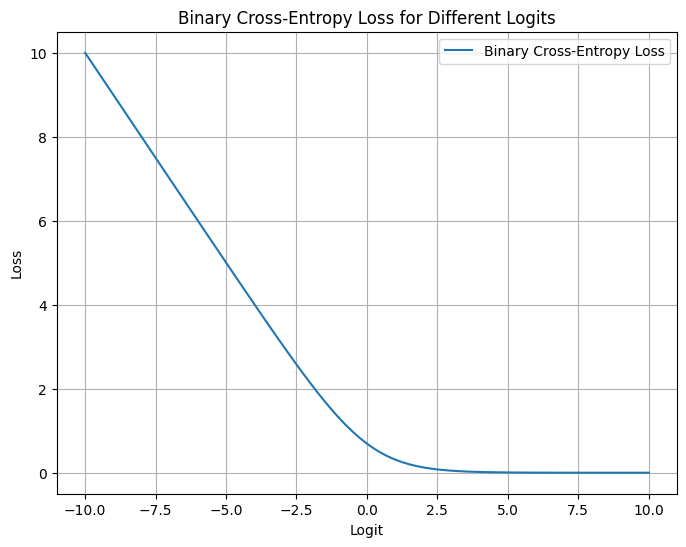

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

# Create a range of values for logits
logit_range = np.linspace(-10, 10, 100)
logits = torch.tensor(logit_range, dtype=torch.float32).unsqueeze(1)

# Compute sigmoid probabilities
probabilities = torch.sigmoid(logits).numpy()

# Assume the true label is 1 (malware) for simplicity
true_labels = torch.ones_like(logits)

# Compute binary cross-entropy loss
binary_cross_entropy_loss = F.binary_cross_entropy_with_logits(logits, true_labels, reduction='none').numpy()

# Plot the binary cross-entropy loss
plt.figure(figsize=(8, 6))
plt.plot(logit_range, binary_cross_entropy_loss, label='Binary Cross-Entropy Loss')
plt.xlabel('Logit')
plt.ylabel('Loss')
plt.title('Binary Cross-Entropy Loss for Different Logits')
plt.legend()
plt.grid(True)
plt.show()


In [58]:
def gkde(x, y, model, penalty_factor, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), y.view(-1).long())

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)

    # Multi-step PGD
    for t in range(k):
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        #y_model = model(x_var)
        if t > 40:
          decayed_penalty_factor = penalty_factor * (1 - t / k)
          print('t : ',t)
          print('decayed_penalty_factor : ',decayed_penalty_factor)
        else:
          decayed_penalty_factor = penalty_factor

        # Compute loss
        loss, _ = get_loss_kde(x_var,y,model, decayed_penalty_factor)
        print('loss : ',loss)
        #loss,_ = get_loss_kde(x_var,y,model,bens, bandwidth, penalty_factor)
        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)
        print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))
        #pos_insertion = (x_var <= 0.5) * 1 * insertion_array
        pos_insertion = (x_var <= 0.5) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.5) * 1 * removal_array
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #gradients =  grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            print('l2norm ; ',l2norm)
            perturbation = (gradients / l2norm).float()
            #perturbation = torch.minimum(torch.tensor(1., dtype=x.dtype, device=x.device), gradients / l2norm).float()
            #perturbation = torch.maximum(torch.tensor(-1., dtype=x.dtype, device=x.device), perturbation).float()
            #perturbation[torch.isnan(perturbation)] = 0.
            #perturbation[torch.isinf(perturbation)] = 1.

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            print('un_mod',un_mod.sum(dim=-1))
            gradients = gradients * un_mod

            val, _ = torch.topk(torch.abs(gradients), 1)
            print('max_grad', val)
            perturbation = (torch.abs(gradients) >= val.expand_as(gradients)).float() * torch.sign(gradients).float()
            # stop perturbing the examples that are successful to evade the victim
            _, done = get_loss_kde(x_next,y,model, penalty_factor)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    outputs = model(x_next)
    loss_adv = criterion(outputs, y.view(-1).long()).data
    _, predicted = torch.topk(outputs, k=1)
    done = (predicted != y).squeeze()

    if is_report_loss_diff:
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    print('loss_natural : ',loss_natural)
    print('loss_adv : ',loss_adv)
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [18]:
def get_loss_kde(adv_x,y,model, penalty_factor):
    criterion = nn.CrossEntropyLoss(reduction='none')
    outputs = model(adv_x)
    ce = criterion(outputs, torch.zeros_like(mals_y.view(-1).long()))
    print('ce: ', ce)
    outputs_rbf = model_gaussian_1000(adv_x)
    kde = criterion(outputs_rbf, torch.zeros_like(mals_y.view(-1).long()))
    #kde=0.
    print('kde : ', kde)
    loss_no_reduction = ce + penalty_factor * kde
    _, predicted = torch.topk(outputs, k=1)
    done = (predicted != y).squeeze()

    return loss_no_reduction, done

In [52]:
adv2 = gkde(mals.to(torch.float32), mals_y, model_AT_rFGSM, 50, insertion_array, removal_array, k=200, step_length=1., norm='l1', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

ce:  tensor([ 41.0281,  86.6297,  58.1584, 186.8452], grad_fn=<NllLossBackward0>)
kde :  tensor([4.5799, 7.3406, 7.3153, 3.8660], grad_fn=<NllLossBackward0>)
loss :  tensor([270.0239, 453.6583, 423.9228, 380.1457], grad_fn=<AddBackward0>)
torch.abs(gradients).sum() :  tensor([27473.8125, 24902.7988, 24146.7676, 10260.3184])
un_mod tensor([10000, 10000, 10000, 10000])
max_grad tensor([[43.0186],
        [37.5190],
        [34.5575],
        [ 8.7332]], dtype=torch.float64)
ce:  tensor([ 41.0281,  86.6297,  58.1584, 186.8452], grad_fn=<NllLossBackward0>)
kde :  tensor([4.5799, 7.3406, 7.3153, 3.8660], grad_fn=<NllLossBackward0>)
ce:  tensor([ 41.4521,  87.1468,  58.7566, 164.5218], grad_fn=<NllLossBackward0>)
kde :  tensor([1.3975, 4.2835, 4.4865, 3.5887], grad_fn=<NllLossBackward0>)
loss :  tensor([111.3284, 301.3212, 283.0825, 343.9585], grad_fn=<AddBackward0>)
torch.abs(gradients).sum() :  tensor([22641.8633, 24454.8613, 23824.1016, 10288.9590])
un_mod tensor([9999, 9999, 9999, 9999])

KeyboardInterrupt: 

In [59]:
adv2 = gkde(mals.to(torch.float32), mals_y, model_AT_rFGSM, 150, insertion_array, removal_array, k=150, step_length=0.1, norm='l2', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

ce:  tensor([ 41.0281,  86.6297,  58.1584, 186.8452], grad_fn=<NllLossBackward0>)
kde :  tensor([4.5799, 7.3406, 7.3153, 3.8660], grad_fn=<NllLossBackward0>)
loss :  tensor([ 728.0156, 1187.7156, 1155.4517,  766.7467], grad_fn=<AddBackward0>)
torch.abs(gradients).sum() :  tensor([65625.9688, 58235.7500, 55779.8438, 13472.1680])
l2norm ;  tensor([[682.7472],
        [596.8692],
        [560.4139],
        [ 57.0439]], dtype=torch.float64)
ce:  tensor([ 46.0083,  90.9380,  62.7585, 188.0305], grad_fn=<NllLossBackward0>)
kde :  tensor([2.7538, 5.7141, 5.7855, 3.7050], grad_fn=<NllLossBackward0>)
loss :  tensor([459.0752, 948.0568, 930.5891, 743.7858], grad_fn=<AddBackward0>)
torch.abs(gradients).sum() :  tensor([62477.9766, 58402.9805, 55649.1953, 13476.3564])
l2norm ;  tensor([[650.8463],
        [600.9231],
        [563.4948],
        [ 57.7570]], dtype=torch.float64)
ce:  tensor([ 50.9619,  95.0748,  67.3104, 189.1739], grad_fn=<NllLossBackward0>)
kde :  tensor([1.1665, 4.0847, 4.2546,

In [30]:
model_AT_rFGSM(adv2)

tensor([[  4.0159,  -4.5420],
        [  0.7008,  -1.1086],
        [  0.8464,  -1.0425],
        [-14.8106,  16.5576]], grad_fn=<AddmmBackward0>)

In [31]:
model_AT_rFGSM(mals.to(torch.float32))

tensor([[-19.8462,  21.1819],
        [-42.3733,  44.2564],
        [-28.2794,  29.8791],
        [-90.6743,  96.1709]], grad_fn=<AddmmBackward0>)

In [50]:
def pgd(x, y, model, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), y.view(-1).long())

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)

    # Multi-step PGD
    for t in range(k):
        print('*********************************************************')
        print('t : ',t)
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        y_model = model(x_var)
        loss = criterion(y_model, y.view(-1).long())
        print('loss : ',loss)

        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = grad_vars[0].data
        print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))

        #pos_insertion = (x_var <= 0.5) * 1 * insertion_array
        pos_insertion = (x_var <= 0.5) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.5) * 1 * removal_array
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #gradients =  grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()
            print('torch.abs(perturbation).sum(dim=-1) : ',torch.abs(perturbation).sum(dim=-1))

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            print('l2norm ; ',l2norm)
            perturbation = (gradients / l2norm).float()
            perturbation = torch.minimum(torch.tensor(1., dtype=x.dtype, device=x.device), gradients / l2norm).float()
            perturbation = torch.maximum(torch.tensor(-1., dtype=x.dtype, device=x.device), perturbation).float()
            perturbation[torch.isnan(perturbation)] = 0.
            perturbation[torch.isinf(perturbation)] = 1.

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x_next - x_var) <= 1e-6
            gradients = gradients * un_mod

            val, _ = torch.topk(torch.abs(gradients), 1)
            print('max(grad) : ',val)
            perturbation = (torch.abs(gradients) >= val.expand_as(gradients)).float() * torch.sign(gradients).float()
            # stop perturbing the examples that are successful to evade the victim
            outputs = model(x_next)
            _, predicted = torch.topk(outputs, k=1)
            done = (predicted != y).squeeze()
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    loss_adv = criterion(model(x_next), y.view(-1).long()).data

    if is_report_loss_diff:
        outputs = model(x_next)
        _, predicted = torch.topk(outputs, k=1)
        done = (predicted != y).squeeze()
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [51]:
def gkde(x, y, model, penalty_factor, insertion_array, removal_array, k=25, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False):
    """
    Projected Gradient Descent (PGD) adversarial attack.
    :param y: Ground truth labels
    :param x: Feature vector
    :param model: Neural network model
    :param k: Number of steps
    :param step_length: Step size for each iteration
    :param norm: Norm used for perturbation ('linf' or 'l2')
    :param initial_rounding_threshold: Threshold parameter for rounding the initial x_next
    :param round_threshold: Threshold parameter for rounding
    :param random: Flag to generate random thresholds
    :param is_report_loss_diff: Flag to report loss difference
    :param is_sample: Flag to sample randomly from the feasible area
    :return: The adversarial version of x (tensor)
    """
    model.eval()

    # Compute natural loss
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss_natural = criterion(model(x), y.view(-1).long())

    # Initialize starting point
    x_next = x.clone()
    x_next = get_x0(x_next, initial_rounding_threshold, is_sample)

    # Multi-step PGD
    for t in range(k):
        print('*************************************************')
        print('t : ',t)
        # Forward pass
        x_var = x_next.clone().detach().requires_grad_(True)
        #y_model = model(x_var)
        if t > 60:
          decayed_penalty_factor = penalty_factor * (1 - t / k)
          #print('t : ',t)
          #print('decayed_penalty_factor : ',decayed_penalty_factor)
        else:
          decayed_penalty_factor = penalty_factor

        # Compute loss
        loss, _ = get_loss_kde(x_var,y,model, decayed_penalty_factor)
        print('loss : ',loss)
        print('loss_natural : ' ,criterion(model(x_var), y.view(-1).long()))
        #loss,_ = get_loss_kde(x_var,y,model,bens, bandwidth, penalty_factor)
        # Compute gradient
        grad_vars = torch.autograd.grad(loss.mean(), x_var)
        gradients = -(grad_vars[0].data)
        print('torch.abs(gradients).sum() : ',torch.abs(gradients).sum(dim=-1))
        #pos_insertion = (x_var <= 0.5) * 1 * insertion_array
        pos_insertion = (x_var <= 0.5) * 1
        grad4insertion = (gradients >= 0) * pos_insertion * gradients

        pos_removal = (x_var > 0.5) * 1 * removal_array
        grad4removal = (gradients < 0) * pos_removal * gradients

        gradients = grad4removal + grad4insertion
        #gradients =  grad4insertion

        # Norm
        if norm == 'linf':
            perturbation = torch.sign(gradients).float()
            print('torch.abs(perturbation).sum(dim=-1) : ',torch.abs(perturbation).sum(dim=-1))

        elif norm == 'l2':
            l2norm = torch.linalg.norm(gradients, dim=-1, keepdim=True)
            print('l2norm ; ',l2norm)
            perturbation = (gradients / l2norm).float()
            perturbation = torch.minimum(torch.tensor(1., dtype=x.dtype, device=x.device), gradients / l2norm).float()
            perturbation = torch.maximum(torch.tensor(-1., dtype=x.dtype, device=x.device), perturbation).float()
            perturbation[torch.isnan(perturbation)] = 0.
            perturbation[torch.isinf(perturbation)] = 1.

        elif norm == 'l1':
            # consider just features of a sample which are not updated yet(because our update is 0to1 or 1to0 not stepwise)
            un_mod = torch.abs(x - x_var) <= 1e-6
            #print('un_mod',un_mod.sum(dim=-1))
            gradients = gradients * un_mod

            val, _ = torch.topk(torch.abs(gradients), 1)
            print('max_grad', val)
            perturbation = (torch.abs(gradients) >= val.expand_as(gradients)).float() * torch.sign(gradients).float()
            # stop perturbing the examples that are successful to evade the victim
            _, done = get_loss_kde(x_next,y,model, penalty_factor)
            if torch.all(done):
                break
            perturbation[done] = 0.

        else:
            raise ValueError("Expect 'l1' or 'l2' or 'linf' norm.")

        # Update x_next
        x_next = torch.clamp(x_next + perturbation * step_length, min=0., max=1.)

    # Rounding step
    if random:
       round_threshold = torch.rand(x_next.size())
    x_next = round_x(x_next, round_threshold=round_threshold)

    # Feasible projection
    #x_next = or_float_tensors(x_next, x)

    # Compute adversarial loss
    outputs = model(x_next)
    loss_adv = criterion(outputs, y.view(-1).long()).data
    _, predicted = torch.topk(outputs, k=1)
    done = (predicted != y).squeeze()

    if is_report_loss_diff:
        print(f"PGD {norm}: Attack effectiveness {done.sum().item() / x.size()[0] * 100:.3f}%.")

    # Replace with natural if adversarial loss is higher
    print('loss_natural : ',loss_natural)
    print('loss_adv : ',loss_adv)
    replace_flag = (loss_adv < loss_natural).squeeze()
    x_next[replace_flag] = x[replace_flag]

    return x_next

In [58]:
def get_loss_kde(adv_x,y,model, penalty_factor):
    criterion = nn.CrossEntropyLoss(reduction='none')
    outputs = model(adv_x)
    ce = criterion(outputs, torch.zeros_like(mals_y.view(-1).long()))
    print('ce: ', ce)
    outputs_rbf = model_gaussian_1000(adv_x)
    kde = criterion(outputs_rbf, torch.zeros_like(mals_y.view(-1).long()))
    #kde=0.
    print('kde : ', kde)
    loss_no_reduction = ce + penalty_factor * kde
    _, predicted = torch.topk(outputs, k=1)
    done = (predicted != y).squeeze()

    return loss_no_reduction, done

#comparing two approaches:

 1: loss based on its class and maximize the loss

 2: loss based on the goal's class and minimize the loss





# `l1 attack`

In [25]:
adv = pgd(mals.to(torch.float32), mals_y, model_AT_rFGSM, insertion_array, removal_array, k=50, step_length=1., norm='l1', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

*********************************************************
t :  0
loss :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([7.4870e-15, 1.1302e-34, 2.6278e-22, 0.0000e+00])
max(grad) :  tensor([[4.3781e-18],
        [5.2451e-38],
        [6.5250e-26],
        [0.0000e+00]], dtype=torch.float64)
*********************************************************
t :  1
loss :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([1.5985e-04, 6.1378e-28, 2.3369e-20, 0.0000e+00])
max(grad) :  tensor([[9.3436e-08],
        [2.5265e-31],
        [5.4686e-24],
        [0.0000e+00]], dtype=torch.float64)
*********************************************************
t :  2
loss :  tensor([10.2994, -0.0000, -0.0000, -0.0000], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([8.8803e+03, 3.7722e-21, 2.1269e-16, 0.0000e+00])
max(grad) :  tensor([[1.6631e+00],
        [1.2673e-24],
        [4.7833e-20],
        

In [33]:
adv2 = gkde(mals.to(torch.float32), mals_y, model_AT_rFGSM, 0, insertion_array, removal_array, k=50, step_length=1., norm='l1', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

t :  0
loss :  tensor([ 41.0281,  86.6297,  58.1584, 186.8452], grad_fn=<AddBackward0>)
loss_natural :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([10107.7500,  9719.9551,  9792.7520,  9011.1484])
max_grad tensor([[5.9220],
        [4.4970],
        [2.4442],
        [5.5750]], dtype=torch.float64)
t :  1
loss :  tensor([ 17.2574,  71.0176,  53.6272, 164.5218], grad_fn=<AddBackward0>)
loss_natural :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([10475.5771,  8753.7480,  9374.5732,  9018.6055])
max_grad tensor([[6.1256],
        [3.5946],
        [2.1932],
        [2.4330]], dtype=torch.float64)
t :  2
loss :  tensor([3.3616e-05, 5.5429e+01, 4.4622e+01, 1.5478e+02],
       grad_fn=<AddBackward0>)
loss_natural :  tensor([10.2994, -0.0000, -0.0000, -0.0000], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([2.9870e-01, 9.1265e+03, 1.0463e+04, 9.0235e+03])
max_grad tensor([[5

In [57]:
model_AT_rFGSM(mals.to(torch.float32))

tensor([[-19.8462,  21.1819],
        [-42.3733,  44.2564],
        [-28.2794,  29.8791],
        [-90.6743,  96.1709]], grad_fn=<AddmmBackward0>)

In [29]:
model_AT_rFGSM(adv)

tensor([[  4.8403,  -5.4591],
        [  1.5538,  -2.2255],
        [  0.8769,  -1.1162],
        [-90.6743,  96.1709]], grad_fn=<AddmmBackward0>)

In [30]:
model_AT_rFGSM(adv2)

tensor([[  4.8403,  -5.4591],
        [  1.5538,  -2.2255],
        [  0.8769,  -1.1162],
        [-14.3782,  16.4776]], grad_fn=<AddmmBackward0>)

# `linf attack`

In [52]:
adv = pgd(mals.to(torch.float32), mals_y, model_AT_rFGSM, insertion_array, removal_array, k=100, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

*********************************************************
t :  0
loss :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([7.4870e-15, 1.1302e-34, 2.6278e-22, 0.0000e+00])
torch.abs(perturbation).sum(dim=-1) :  tensor([121., 225., 247.,   0.])
*********************************************************
t :  1
loss :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([6.6104e-14, 2.6541e-32, 9.4535e-21, 0.0000e+00])
torch.abs(perturbation).sum(dim=-1) :  tensor([114., 269., 199.,   0.])
*********************************************************
t :  2
loss :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([3.9466e-13, 3.1007e-29, 5.3306e-19, 0.0000e+00])
torch.abs(perturbation).sum(dim=-1) :  tensor([105., 316., 209.,   0.])
*********************************************************
t :  3
loss :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
tor

In [53]:
adv2 = gkde(mals.to(torch.float32), mals_y, model_AT_rFGSM, 0, insertion_array, removal_array, k=100, step_length=0.02, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

*************************************************
t :  0
loss :  tensor([ 41.0281,  86.6297,  58.1584, 186.8452], grad_fn=<AddBackward0>)
loss_natural :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([10107.7500,  9719.9551,  9792.7520,  9011.1484])
torch.abs(perturbation).sum(dim=-1) :  tensor([119., 224., 242., 269.])
*************************************************
t :  1
loss :  tensor([ 38.9261,  81.0620,  54.4818, 180.4803], grad_fn=<AddBackward0>)
loss_natural :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([10320.1094,  8620.9150,  9300.6074,  9011.1484])
torch.abs(perturbation).sum(dim=-1) :  tensor([102., 261., 197., 269.])
*************************************************
t :  2
loss :  tensor([ 36.9672,  74.1730,  50.4399, 174.7070], grad_fn=<AddBackward0>)
loss_natural :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([9165.1289, 

In [56]:
model_AT_rFGSM(mals.to(torch.float32))

tensor([[-19.8462,  21.1819],
        [-42.3733,  44.2564],
        [-28.2794,  29.8791],
        [-90.6743,  96.1709]], grad_fn=<AddmmBackward0>)

In [54]:
model_AT_rFGSM(adv)

tensor([[-11.4985,  13.8264],
        [-21.6522,  25.6011],
        [-25.6268,  30.0696],
        [-90.6743,  96.1709]], grad_fn=<AddmmBackward0>)

In [55]:
model_AT_rFGSM(adv2)

tensor([[-15.0647,  16.9694],
        [-21.0841,  23.9766],
        [-19.3803,  23.2305],
        [-35.6905,  40.3540]], grad_fn=<AddmmBackward0>)

#comparing two attacks:
loss based on the goal's class and minimize the loss

 1: without loss of rbf

 2: with loss of rbf

# `l1 attack`

In [59]:
adv = gkde(mals.to(torch.float32), mals_y, model_AT_rFGSM, 0, insertion_array, removal_array, k=50, step_length=1., norm='l1', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

*************************************************
t :  0
ce:  tensor([ 41.0281,  86.6297,  58.1584, 186.8452], grad_fn=<NllLossBackward0>)
kde :  tensor([4.5799, 7.3406, 7.3153, 3.8660], grad_fn=<NllLossBackward0>)
loss :  tensor([ 41.0281,  86.6297,  58.1584, 186.8452], grad_fn=<AddBackward0>)
loss_natural :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([10107.7500,  9719.9551,  9792.7520,  9011.1484])
max_grad tensor([[5.9220],
        [4.4970],
        [2.4442],
        [5.5750]], dtype=torch.float64)
ce:  tensor([ 41.0281,  86.6297,  58.1584, 186.8452], grad_fn=<NllLossBackward0>)
kde :  tensor([4.5799, 7.3406, 7.3153, 3.8660], grad_fn=<NllLossBackward0>)
*************************************************
t :  1
ce:  tensor([ 17.2574,  71.0176,  53.6272, 164.5218], grad_fn=<NllLossBackward0>)
kde :  tensor([4.1610, 6.9179, 7.9014, 3.5887], grad_fn=<NllLossBackward0>)
loss :  tensor([ 17.2574,  71.0176,  53.6272, 164.5218], grad_fn=<Ad

In [65]:
adv2 = gkde(mals.to(torch.float32), mals_y, model_AT_rFGSM, 10., insertion_array, removal_array, k=50, step_length=1., norm='l1', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

*************************************************
t :  0
ce:  tensor([ 41.0281,  86.6297,  58.1584, 186.8452], grad_fn=<NllLossBackward0>)
kde :  tensor([4.5799, 7.3406, 7.3153, 3.8660], grad_fn=<NllLossBackward0>)
loss :  tensor([ 86.8272, 160.0354, 131.3113, 225.5053], grad_fn=<AddBackward0>)
loss_natural :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([12908.3301, 12200.0391, 12128.9160,  9213.8662])
max_grad tensor([[8.5023],
        [7.3571],
        [7.0327],
        [6.2066]], dtype=torch.float64)
ce:  tensor([ 41.0281,  86.6297,  58.1584, 186.8452], grad_fn=<NllLossBackward0>)
kde :  tensor([4.5799, 7.3406, 7.3153, 3.8660], grad_fn=<NllLossBackward0>)
*************************************************
t :  1
ce:  tensor([ 41.4521,  87.1468,  56.9110, 164.5218], grad_fn=<NllLossBackward0>)
kde :  tensor([1.3975, 4.2835, 4.5723, 3.5887], grad_fn=<NllLossBackward0>)
loss :  tensor([ 55.4273, 129.9817, 102.6341, 200.4092], grad_fn=<Ad

In [68]:
model_AT_rFGSM(mals.to(torch.float32))

tensor([[-19.8462,  21.1819],
        [-42.3733,  44.2564],
        [-28.2794,  29.8791],
        [-90.6743,  96.1709]], grad_fn=<AddmmBackward0>)

In [69]:
model_AT_rFGSM(adv)

tensor([[  4.8403,  -5.4591],
        [  1.5538,  -2.2255],
        [  0.8769,  -1.1162],
        [-14.3782,  16.4776]], grad_fn=<AddmmBackward0>)

In [70]:
model_AT_rFGSM(adv2)

tensor([[  4.0159,  -4.5420],
        [  1.0198,  -1.5311],
        [ -0.0686,  -0.0795],
        [-12.8020,  14.3310]], grad_fn=<AddmmBackward0>)

# `l2 attack`

In [76]:
adv = gkde(mals.to(torch.float32), mals_y, model_AT_rFGSM, 0, insertion_array, removal_array, k=200, step_length=0.05, norm='l2', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

*************************************************
t :  0
ce:  tensor([ 41.0281,  86.6297,  58.1584, 186.8452], grad_fn=<NllLossBackward0>)
kde :  tensor([4.5799, 7.3406, 7.3153, 3.8660], grad_fn=<NllLossBackward0>)
loss :  tensor([ 41.0281,  86.6297,  58.1584, 186.8452], grad_fn=<AddBackward0>)
loss_natural :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([10107.7500,  9719.9551,  9792.7520,  9011.1484])
l2norm ;  tensor([[ 9.5710],
        [10.5145],
        [ 7.2150],
        [ 8.9417]], dtype=torch.float64)
*************************************************
t :  1
ce:  tensor([ 39.1132,  84.6820,  56.7476, 185.0569], grad_fn=<NllLossBackward0>)
kde :  tensor([4.5578, 7.3161, 7.3356, 3.8596], grad_fn=<NllLossBackward0>)
loss :  tensor([ 39.1132,  84.6820,  56.7476, 185.0569], grad_fn=<AddBackward0>)
loss_natural :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([10214.1045,  8661.5039,  9349

In [77]:
adv2 = gkde(mals.to(torch.float32), mals_y, model_AT_rFGSM, 10., insertion_array, removal_array, k=200, step_length=0.05, norm='l2', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

*************************************************
t :  0
ce:  tensor([ 41.0281,  86.6297,  58.1584, 186.8452], grad_fn=<NllLossBackward0>)
kde :  tensor([4.5799, 7.3406, 7.3153, 3.8660], grad_fn=<NllLossBackward0>)
loss :  tensor([ 86.8272, 160.0354, 131.3113, 225.5053], grad_fn=<AddBackward0>)
loss_natural :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([12908.3301, 12200.0391, 12128.9160,  9213.8662])
l2norm ;  tensor([[39.2907],
        [35.4687],
        [31.5366],
        [ 9.6098]], dtype=torch.float64)
*************************************************
t :  1
ce:  tensor([ 41.5093,  86.7509,  58.7423, 185.1393], grad_fn=<NllLossBackward0>)
kde :  tensor([3.7467, 6.6161, 6.6243, 3.8441], grad_fn=<NllLossBackward0>)
loss :  tensor([ 78.9762, 152.9120, 124.9852, 223.5802], grad_fn=<AddBackward0>)
loss_natural :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([12724.6670, 12209.9180, 12067

In [78]:
model_AT_rFGSM(mals.to(torch.float32))

tensor([[-19.8462,  21.1819],
        [-42.3733,  44.2564],
        [-28.2794,  29.8791],
        [-90.6743,  96.1709]], grad_fn=<AddmmBackward0>)

In [79]:
model_AT_rFGSM(adv)

tensor([[  2.7636,  -3.8715],
        [  1.0458,  -1.5833],
        [ -4.3548,   4.9399],
        [-14.6555,  17.6070]], grad_fn=<AddmmBackward0>)

In [80]:
model_AT_rFGSM(adv2)

tensor([[  1.5029,  -2.3014],
        [  1.7673,  -2.1779],
        [ -2.5506,   2.9788],
        [-12.6903,  16.1456]], grad_fn=<AddmmBackward0>)

# `linf attack`

In [81]:
adv = gkde(mals.to(torch.float32), mals_y, model_AT_rFGSM, 0, insertion_array, removal_array, k=200, step_length=0.01, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

*************************************************
t :  0
ce:  tensor([ 41.0281,  86.6297,  58.1584, 186.8452], grad_fn=<NllLossBackward0>)
kde :  tensor([4.5799, 7.3406, 7.3153, 3.8660], grad_fn=<NllLossBackward0>)
loss :  tensor([ 41.0281,  86.6297,  58.1584, 186.8452], grad_fn=<AddBackward0>)
loss_natural :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([10107.7500,  9719.9551,  9792.7520,  9011.1484])
torch.abs(perturbation).sum(dim=-1) :  tensor([119., 224., 242., 269.])
*************************************************
t :  1
ce:  tensor([ 39.7414,  83.8590,  56.2299, 183.6628], grad_fn=<NllLossBackward0>)
kde :  tensor([4.3323, 7.0148, 6.9912, 3.8433], grad_fn=<NllLossBackward0>)
loss :  tensor([ 39.7414,  83.8590,  56.2299, 183.6628], grad_fn=<AddBackward0>)
loss_natural :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([9534.6865, 8728.3252, 9188.6270, 9011.1484])
torch.abs(perturbati

In [82]:
adv2 = gkde(mals.to(torch.float32), mals_y, model_AT_rFGSM, 10., insertion_array, removal_array, k=200, step_length=0.01, norm='linf', initial_rounding_threshold=0.5, round_threshold=0.5, random=False, is_report_loss_diff=True, is_sample=False)

*************************************************
t :  0
ce:  tensor([ 41.0281,  86.6297,  58.1584, 186.8452], grad_fn=<NllLossBackward0>)
kde :  tensor([4.5799, 7.3406, 7.3153, 3.8660], grad_fn=<NllLossBackward0>)
loss :  tensor([ 86.8272, 160.0354, 131.3113, 225.5053], grad_fn=<AddBackward0>)
loss_natural :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([12908.3301, 12200.0391, 12128.9160,  9213.8662])
torch.abs(perturbation).sum(dim=-1) :  tensor([569., 649., 634., 314.])
*************************************************
t :  1
ce:  tensor([ 48.1498,  90.9962,  62.7146, 183.9560], grad_fn=<NllLossBackward0>)
kde :  tensor([1.7040, 4.6597, 4.8681, 3.7831], grad_fn=<NllLossBackward0>)
loss :  tensor([ 65.1894, 137.5929, 111.3960, 221.7865], grad_fn=<AddBackward0>)
loss_natural :  tensor([-0., -0., -0., -0.], grad_fn=<NllLossBackward0>)
torch.abs(gradients).sum() :  tensor([12323.3936, 11944.3076, 11665.9707,  9221.0312])
torch.abs(pertur

In [83]:
model_AT_rFGSM(mals.to(torch.float32))

tensor([[-19.8462,  21.1819],
        [-42.3733,  44.2564],
        [-28.2794,  29.8791],
        [-90.6743,  96.1709]], grad_fn=<AddmmBackward0>)

In [84]:
model_AT_rFGSM(adv)

tensor([[-15.0439,  16.9277],
        [-25.3470,  28.5899],
        [-27.2132,  31.3625],
        [-36.7231,  41.4289]], grad_fn=<AddmmBackward0>)

In [85]:
model_AT_rFGSM(adv2)

tensor([[-19.8213,  23.4770],
        [-27.4885,  30.7869],
        [-19.7688,  23.2969],
        [-39.5807,  44.1316]], grad_fn=<AddmmBackward0>)